### Spatial frequency

In [ ]:
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palettable.scientific.sequential import Nuuk_3 as ColMap
from src.config import SUBJECTS, SESSION, N_LAYER
from src.stats import Bootstrap
plt.style.use(os.path.join(module_path, "src", "default.mplstyle"))

DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/spatial_scale"
#DIR_DATA = "/data/pt_01880/Experiment1_ODC/paper/filter_bank"

# set
SESS = "GE_EPI"

In [12]:
def get_profile(sess, day):
    y = np.zeros((N_LAYER, len(SUBJECTS)))
    for i, subj in enumerate(SUBJECTS):
        path = Path(DIR_DATA) / subj / f"{sess}{SESSION[subj][sess][day]}"
        for j in range(N_LAYER):
            file1 = path / f"lh.spatial_scale_layer_{j}.npy"
            file2 = path / f"rh.spatial_scale_layer_{j}.npy"
            data1 = np.load(file1, allow_pickle=True).flat[0]
            data2 = np.load(file2, allow_pickle=True).flat[0]
            tmp = np.concatenate((data1["length"], data2["length"]), axis=0)
            y[j, i] = 2 * np.mean(tmp)
    return y

#def get_profile(sess, day):
#    y = np.zeros((N_LAYER, len(SUBJECTS)))
#    for i, subj in enumerate(SUBJECTS):
#        path = Path(DIR_DATA) / subj / f"{sess}{SESSION[subj][sess][day]}"
#        for j in range(N_LAYER):
#            file1 = path / f"lh.filter_bank_layer_{j}.parquet"
#            file2 = path / f"rh.filter_bank_layer_{j}.parquet"
#            data1 = pd.read_parquet(file1)
#            data2 = pd.read_parquet(file2)
#            tmp = np.concatenate((data1["lambda"], data2["lambda"]), axis=0)
#            y[j, i] = np.mean(tmp)
#    return y

In [93]:
x = np.linspace(0, 1, N_LAYER)
y1 = get_profile(SESS, 0)
y2 = get_profile(SESS, 1)
y3 = np.append(y1, y2, axis=1)

ci_low = []
ci_high = []
for i in range(N_LAYER):
    boot = Bootstrap(y3[i,:])
    low, high = boot.confidence_interval()
    ci_low.append(low)
    ci_high.append(high)

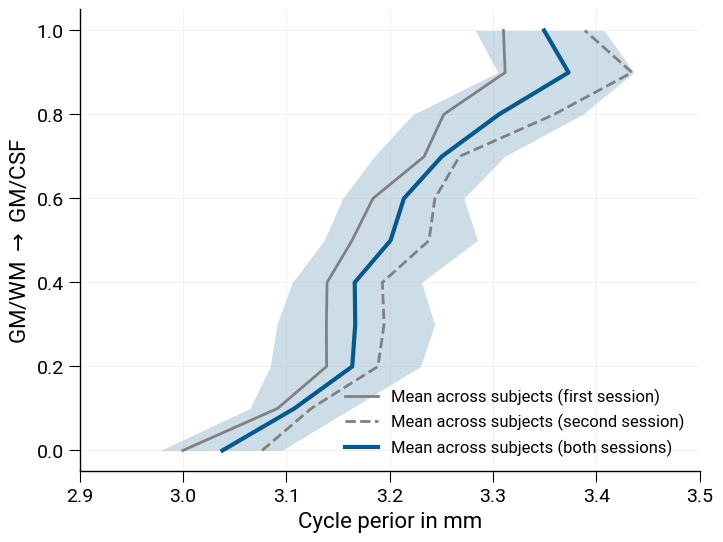

In [94]:
fig, ax = plt.subplots()
color = ColMap.hex_colors
ax.plot(np.mean(y1, axis=1), x, color="gray", linestyle="-", label="Mean across subjects (first session)")
ax.plot(np.mean(y2, axis=1), x, color="gray", linestyle="--", label="Mean across subjects (second session)")
ax.plot(np.mean(y3, axis=1), x, color=color[0], linestyle="-", label="Mean across subjects (both sessions)", lw=3)
ax.fill_betweenx(x, ci_low, ci_high, color=color[0], alpha=0.2, lw=0)
ax.set_ylabel(r"GM/WM $\rightarrow$ GM/CSF")
ax.set_xlabel("Cycle perior in mm")
ax.legend(loc="lower right")
ax.set_xlim([2.9, 3.5])
file_out = f"/data/pt_01880/decoding_{SESS}.svg"
#fig.savefig(file_out, dpi=300, bbox_inches="tight", transparent=True, format="svg")